# Goeduhub | Task - 16 (Naive Bayes Classification using Titanic Dataset)

# Reg - ID : GO_STP_2134  
---

### Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which 

### is an equation describing the relationship of conditional probabilities of statistical quantities.  
  
---
  

- __Create a Model using Naive Bayes classifiers to predict whether a passenger on the titanic would have been survived or not.__
  
  
- Dataset can be downloaded from Kaggle

### Importing Primary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset using Pandas

In [2]:
df=pd.read_csv(r'E:/Goeduhub_ML_Program_May_20/data/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Basic stats about data

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

### Checking for null values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].mode()

0    24.0
dtype: float64

### Filling the null values with most repeated values

In [9]:
df['Age'].fillna(int(df['Age'].mode()),inplace=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Plotting of null values through heatmap

<AxesSubplot:>

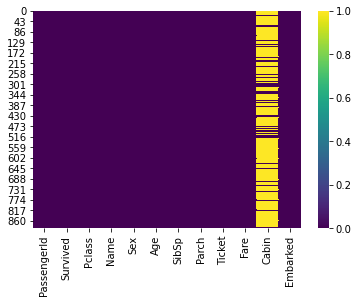

In [11]:
sns.heatmap(df.isnull(),cmap='viridis')

In [12]:
df.drop('Cabin',axis=1,inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Missing number plot

In [14]:
import missingno as msno

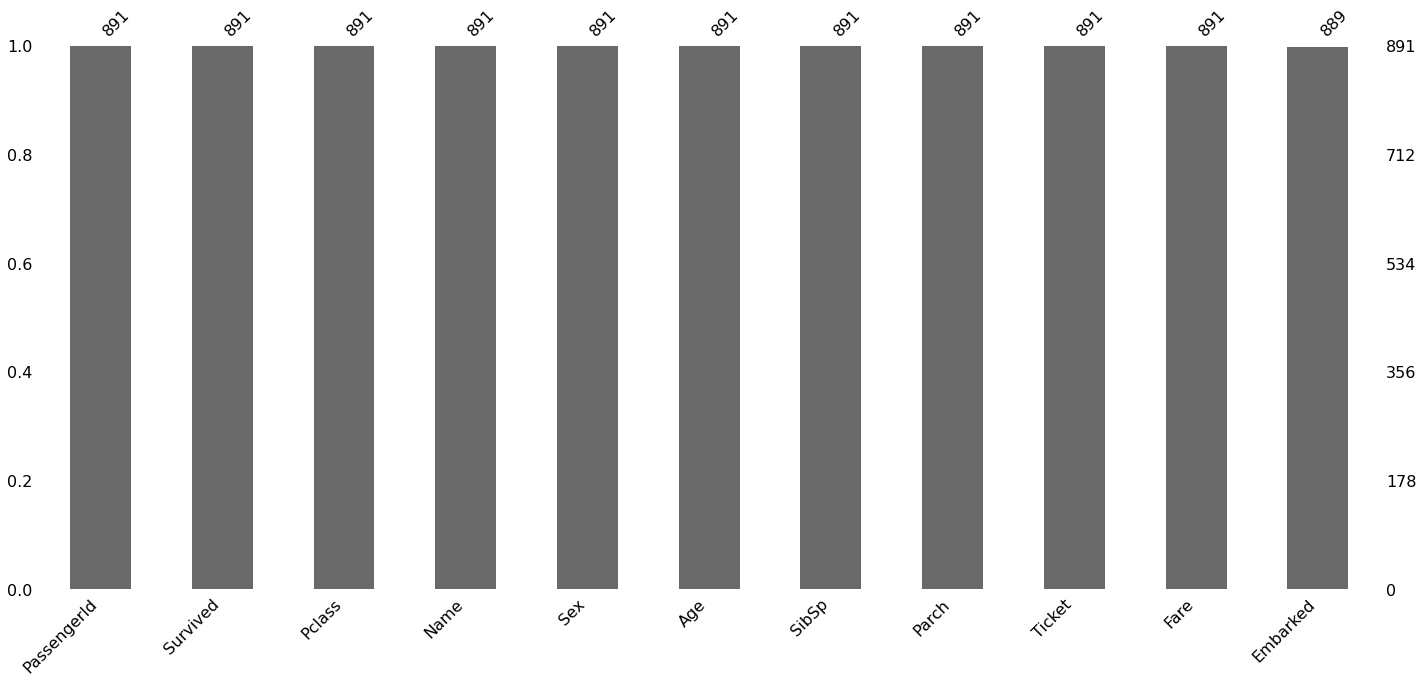

In [15]:
msno.bar(df)
plt.show()

### Knowing about category values

In [16]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
df['Survived']=df['Survived'].map({0:'Not survived',1:'Survived'})
df['Survived'].value_counts()

Not survived    549
Survived        342
Name: Survived, dtype: int64

In [18]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [20]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
len(df)

891

In [23]:
df.groupby('Survived')['SibSp'].mean()

Survived
Not survived    0.553734
Survived        0.473684
Name: SibSp, dtype: float64

### Groupby Columns

In [24]:
x=df.groupby(['Survived','Sex']).mean()
x

PassengerId    Pclass        Age     SibSp     Parch  \
Survived     Sex                                                            
Not survived female   434.851852  2.851852  24.827160  1.209877  1.037037   
             male     449.121795  2.476496  29.860043  0.440171  0.207265   
Survived     female   429.699571  1.918455  28.098712  0.515021  0.515021   
             male     475.724771  2.018349  26.795138  0.385321  0.357798   

                          Fare  
Survived     Sex                
Not survived female  23.024385  
             male    21.960993  
Survived     female  51.938573  
             male    40.821484

In [25]:
df.groupby(['SibSp','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  Parch  Ticket  Fare  \
SibSp Survived                                                                 
0     Not survived          398     398   398  398  398    398     398   398   
      Survived              210     210   210  210  210    210     210   210   
1     Not survived           97      97    97   97   97     97      97    97   
      Survived              112     112   112  112  112    112     112   112   
2     Not survived           15      15    15   15   15     15      15    15   
      Survived               13      13    13   13   13     13      13    13   
3     Not survived           12      12    12   12   12     12      12    12   
      Survived                4       4     4    4    4      4       4     4   
4     Not survived           15      15    15   15   15     15      15    15   
      Survived                3       3     3    3    3      3       3     3   
5     Not survived            5       5     5    5    5      5       5     5   
8     Not survived            7       7     7    7    7      7       7     7   

                    Embarked  
SibSp Survived                
0     Not survived       398  
      Survived           208  
1     Not survived        97  
      Survived           112  
2     Not survived        15  
      Survived            13  
3     Not survived        12  
      Survived             4  
4     Not survived        15  
      Survived             3  
5     Not survived         5  
8     Not survived         7

In [26]:
df.groupby(['Pclass','Survived','Sex']).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  \
Pclass Survived     Sex                                                    
1      Not survived female            3     3    3      3      3       3   
                    male             77    77   77     77     77      77   
       Survived     female           91    91   91     91     91      91   
                    male             45    45   45     45     45      45   
2      Not survived female            6     6    6      6      6       6   
                    male             91    91   91     91     91      91   
       Survived     female           70    70   70     70     70      70   
                    male             17    17   17     17     17      17   
3      Not survived female           72    72   72     72     72      72   
                    male            300   300  300    300    300     300   
       Survived     female           72    72   72     72     72      72   
                    male             47    47   47     47     47      47   

                            Fare  Embarked  
Pclass Survived     Sex                     
1      Not survived female     3         3  
                    male      77        77  
       Survived     female    91        89  
                    male      45        45  
2      Not survived female     6         6  
                    male      91        91  
       Survived     female    70        70  
                    male      17        17  
3      Not survived female    72        72  
                    male     300       300  
       Survived     female    72        72  
                    male      47        47

In [27]:
df.groupby(['Embarked','Survived','Sex'])['Pclass'].count()

Embarked  Survived      Sex   
C         Not survived  female      9
                        male       66
          Survived      female     64
                        male       29
Q         Not survived  female      9
                        male       38
          Survived      female     27
                        male        3
S         Not survived  female     63
                        male      364
          Survived      female    140
                        male       77
Name: Pclass, dtype: int64

### Univariate Analysis

In [29]:
def plot_numerical(var,color):
    fig,axes=plt.subplots(2,2,figsize=(14,10))
    sns.histplot(x=df[var],ax=axes[0][0],color=color,bins=20)
    sns.kdeplot(x=df[var],ax=axes[0][1],fill=True)
    sns.distplot(x=df[var],ax=axes[1][0])
    sns.violinplot(x=df.Survived,y=df[var],ax=axes[1][1])
    plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


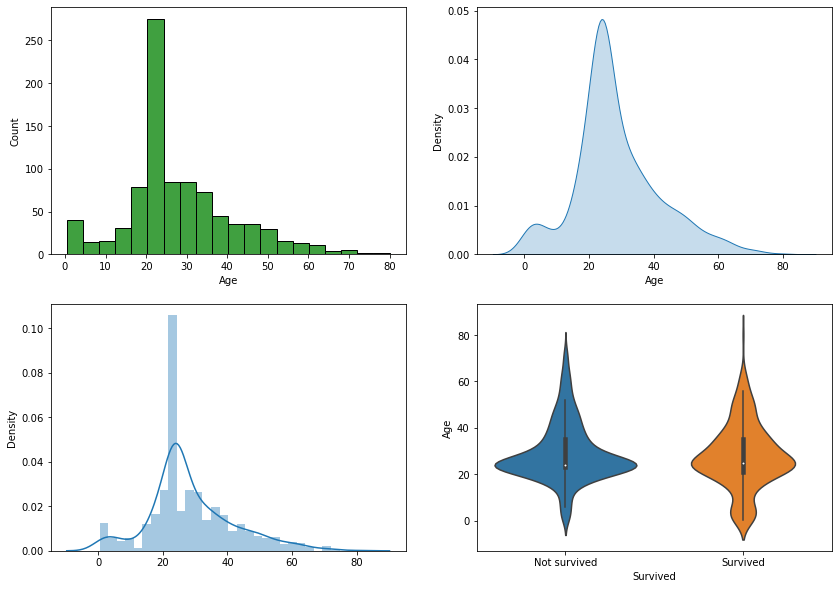

In [55]:
plot_numerical('Age','green')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


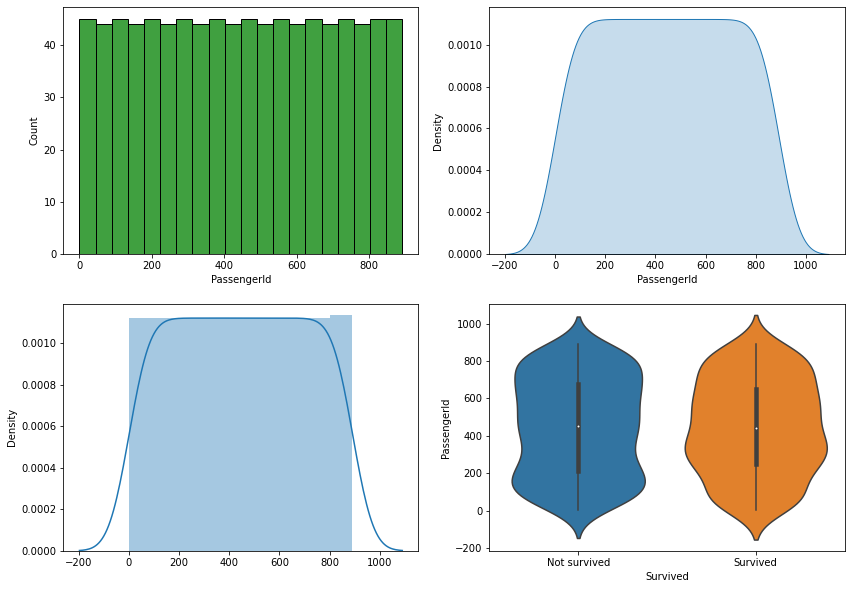

In [32]:
plot_numerical('PassengerId','green')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


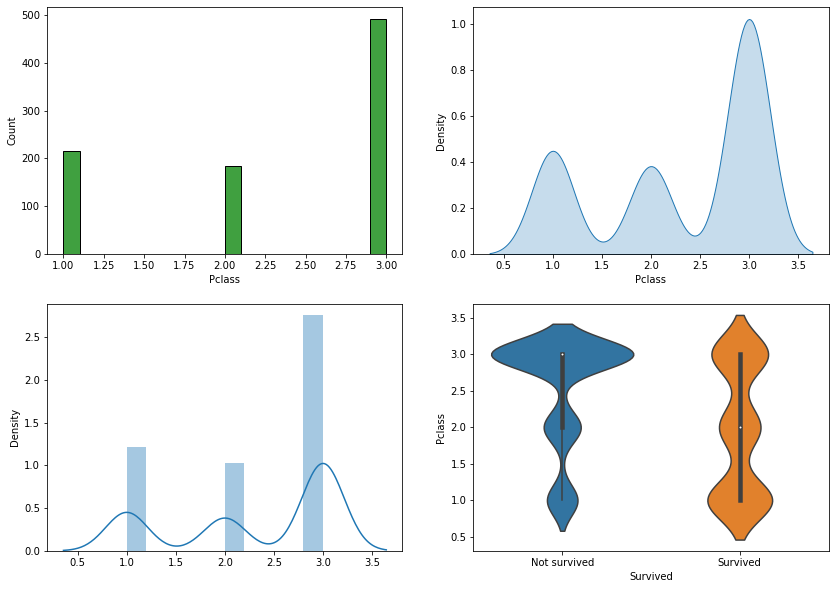

In [33]:
plot_numerical('Pclass','green')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


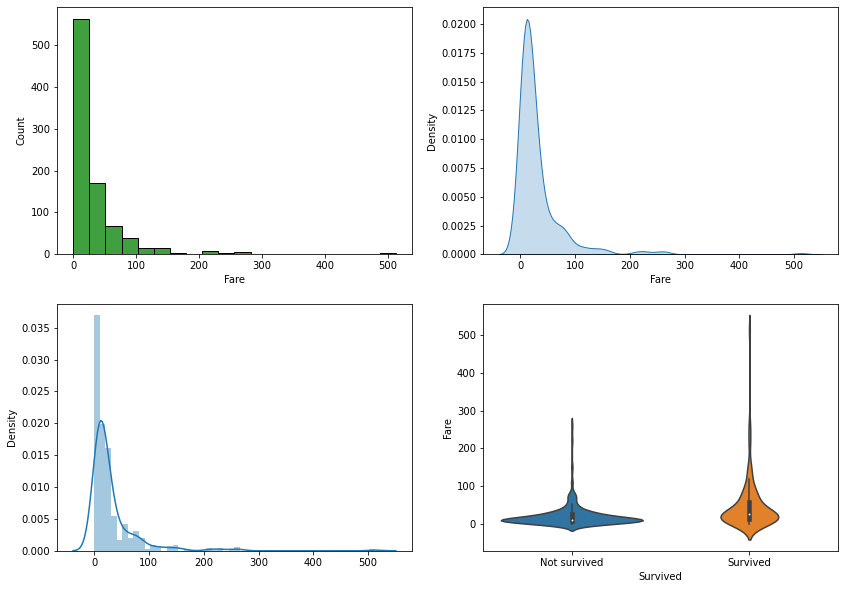

In [34]:
plot_numerical('Fare','green')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


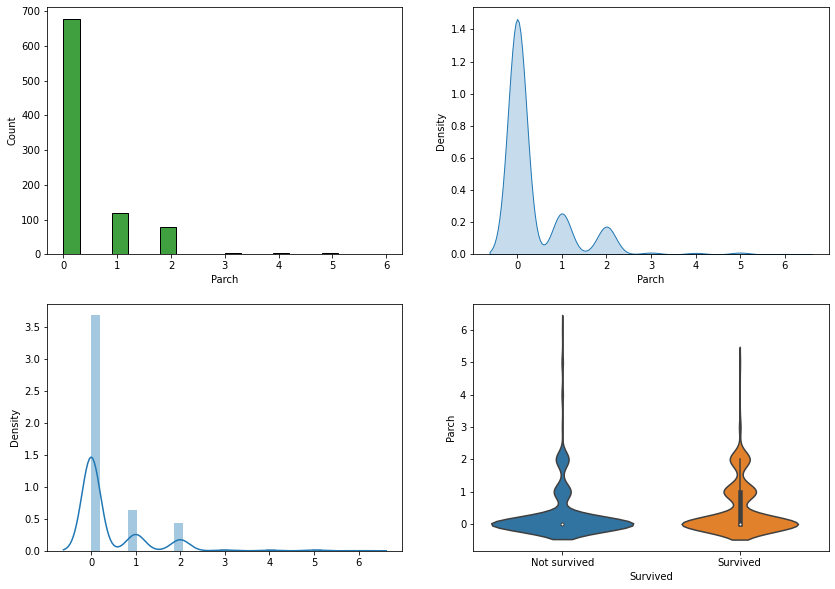

In [35]:
plot_numerical('Parch','green')

In [36]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Not survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,Not survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Bivariate and Mulitvariate analysis

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

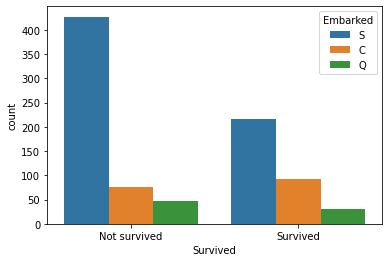

In [37]:
sns.countplot('Survived',data=df,hue='Embarked')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

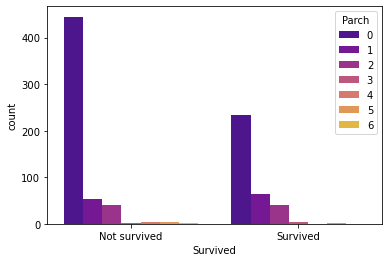

In [38]:
sns.countplot('Survived',data=df,hue='Parch',palette='plasma')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

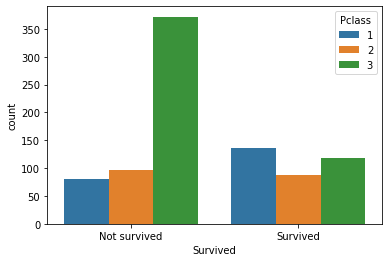

In [39]:
sns.countplot('Survived',data=df,hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

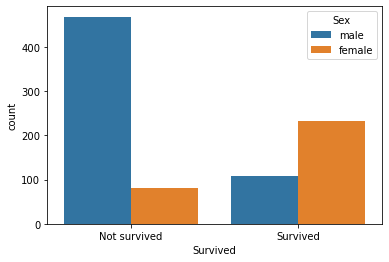

In [41]:
sns.countplot('Survived',data=df,hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

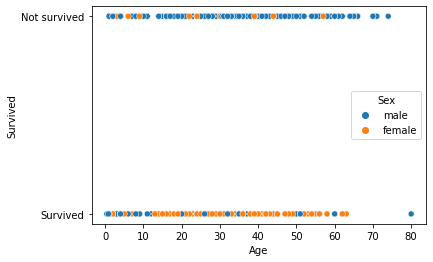

In [48]:
sns.scatterplot(x='Age',y='Survived',data=df,hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

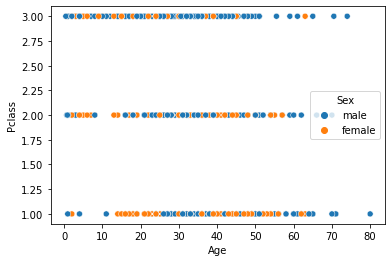

In [49]:
sns.scatterplot(x='Age',y='Pclass',data=df,hue='Sex')

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Not survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,Not survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Fare', ylabel='PassengerId'>

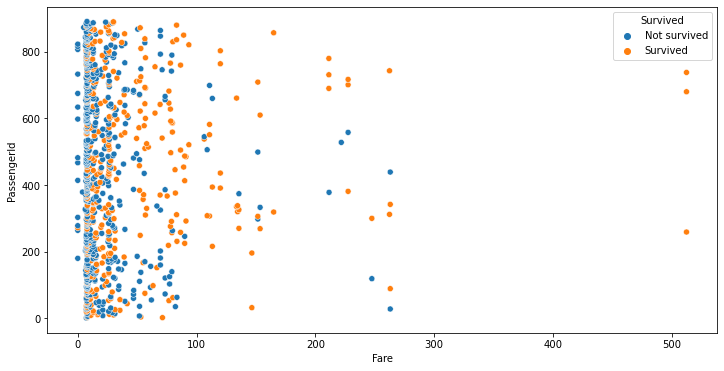

In [53]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Fare',y='PassengerId',data=df,hue='Survived')

### Label encoding

In [54]:
from sklearn.preprocessing import LabelEncoder as le

In [55]:
LE=le()
def cattonum(param):
    df[param]=LE.fit_transform(df[param])

In [59]:
cattonum('Survived')

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [61]:
cattonum('Sex')

In [62]:
df['Ticket'].value_counts()

1601             7
347082           7
CA. 2343         7
CA 2144          6
3101295          6
                ..
PC 17585         1
382649           1
2669             1
S.O./P.P. 751    1
34218            1
Name: Ticket, Length: 681, dtype: int64

In [63]:
cattonum('Embarked')

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [70]:
df.drop('Name',axis=1,inplace=True)

In [71]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<AxesSubplot:>

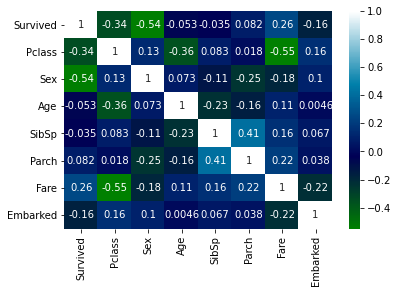

In [74]:
sns.heatmap(df.corr(),cmap='ocean',annot=True)

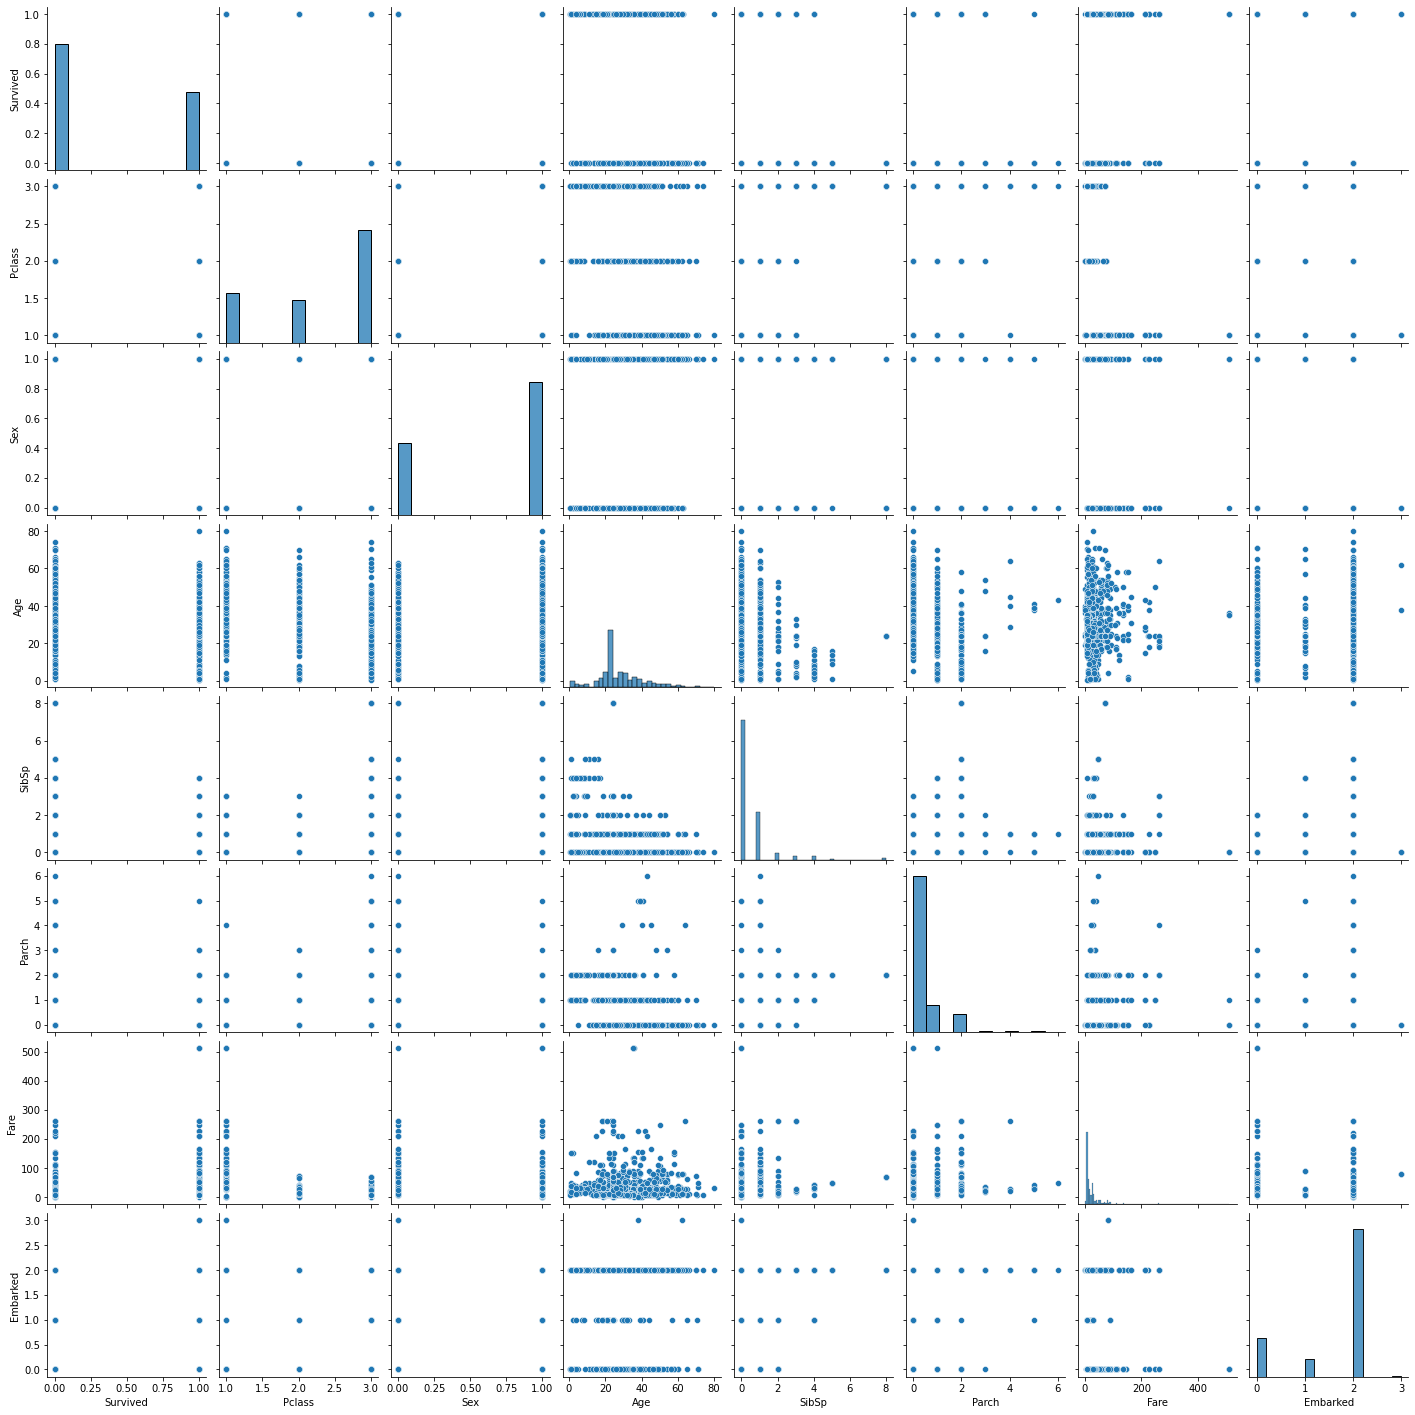

In [75]:
sns.pairplot(df)

### Model Building

In [76]:
y=df.Survived
x=df.drop('Survived',axis=1)

In [77]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [78]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [79]:
y.isnull().sum()

0

In [80]:
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [81]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=45)

In [82]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [83]:
model.fit(xtrain,ytrain)

GaussianNB()

In [84]:
model.score(xtest,ytest)

0.8100558659217877

In [85]:
xtest[:10]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
248,1,1,37.0,1,1,52.5542,2
197,3,1,42.0,0,1,8.4042,2
133,2,0,29.0,1,0,26.0000,2
169,3,1,28.0,0,0,56.4958,2
736,3,0,48.0,1,3,34.3750,2
166,1,0,24.0,0,1,55.0000,2
250,3,1,24.0,0,0,7.2500,2
719,3,1,33.0,0,0,7.7750,2
603,3,1,44.0,0,0,8.0500,2
471,3,1,38.0,0,0,8.6625,2


In [86]:
ytest[:10]

248    1
197    0
133    1
169    0
736    0
166    1
250    0
719    0
603    0
471    0
Name: Survived, dtype: int32

### Prediction

In [87]:
model.predict(xtest[:10])

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [88]:
model.predict_proba(xtest[:10])

array([[0.62612721, 0.37387279],
       [0.94616759, 0.05383241],
       [0.24265101, 0.75734899],
       [0.91143046, 0.08856954],
       [0.54695696, 0.45304304],
       [0.03986954, 0.96013046],
       [0.94866516, 0.05133484],
       [0.95239307, 0.04760693],
       [0.95155955, 0.04844045],
       [0.95289329, 0.04710671]])